# A/B testing finding customers

https://www.kaggle.com/datasets/amirmotefaker/ab-testing-dataset/data

A/B testing helps in finding a better approach to finding customers, marketing products, getting a higher reach, or anything that helps a business convert most of its target customers into actual customers.

Below are all the features in the dataset:

- Campaign Name: The name of the campaign
- Date: Date of the record
- Spend: Amount spent on the campaign in dollars
- \# of Impressions: Number of impressions the ad crossed through the campaign
- Reach: The number of unique impressions received in the ad
- \# of Website Clicks: Number of website clicks received through the ads
- \# of Searches: Number of users who performed searches on the website
- \# of View Content: Number of users who viewed content and products on the website
- \# of Add to Cart: Number of users who added products to the cart
- \# of Purchase: Number of purchases

Two campaigns were performed by the company:

- Control Campaign
- Test Campaign

-----

There is no more information on the parameter that changed between the control group and the test group, but we can still define the metrics we want to test between the 2 groups.

Metrics we could test : 
- **Cost per Impressions** = `Spend / # of Impressions`

- **Cost per Website Click** = `Spend / # of Website Clicks`

- **Impression to Reach Ratio** = `# of Impressions / Reach`  →  How many times the ad was shown to the same user

- **Click through rate** = `(# of Website Clicks / # of Impressions) * 100` →  Measures how effective the ad is in generating clicks

- **Add to cart rate** = `(# of Add to Cart / # of Website Clicks) * 100`

- **View-to-Purchase Rate** = `(# of View Content / # of Purchase) * 100`

- **Overall Conversion Rate** = `(# of Purchase / # of Website Clicks) * 100`

- **Revenue per Click** = `sum(# of Purchase) / # of Website Clicks`


## 1.  Import and control the data

In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("amirmotefaker/ab-testing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\kelia\.cache\kagglehub\datasets\amirmotefaker\ab-testing-dataset\versions\1


In [2]:
import os
print(os.listdir(path))

['control_group.csv', 'test_group.csv']


In [3]:
control_group = pd.read_csv(path + '/control_group.csv', sep=';')
control_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test_group = pd.read_csv(path + '/test_group.csv', sep=';')
test_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [5]:
control_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [6]:
test_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


### 1.1. Null values and duplicates

We can see in the .info() that there are missing values in the control group.

In [7]:
# Print rows with null values in control_group
control_group[control_group.isnull().any(axis=1)]

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All the missing values are from the same compaign, which means that we can remove the compaign since it represents only around 3% of the overall dataset.

We also remove the corresponding compaign in the test group since we need to keep the same number of compaigns in both groups.

In [8]:
# Get the line index BEFORE removing NaN values
null_index = control_group[control_group.isnull().any(axis=1)].index

# Remove these lines from test_group
test_group = test_group.drop(index=null_index)

# Now remove NaN values from control_group
control_group = control_group.dropna()

# Print confirmation
print('\nRemoved null values\n', control_group.isna().sum()) 
print('\nTest_data header to see if the line has been removed:', test_group.shape)


Removed null values
 Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

Test_data header to see if the line has been removed: (29, 10)


In [9]:
control_group.duplicated().sum()

0

In [10]:
test_group.duplicated().sum()

0

### 1.2. Changing dtypes

In [11]:
# Change dtypes to match the test set
int_to_float = control_group.select_dtypes('float64').columns
control_group[int_to_float] = control_group[int_to_float].astype('int64')

# Verify
control_group.dtypes

Campaign Name          object
Date                   object
Spend [USD]             int64
# of Impressions        int64
Reach                   int64
# of Website Clicks     int64
# of Searches           int64
# of View Content       int64
# of Add to Cart        int64
# of Purchase           int64
dtype: object

In [12]:
# Changing Data dtype to datetime
test_group['Date'] = pd.to_datetime(test_group['Date'], format='%d.%m.%Y')
control_group['Date'] = pd.to_datetime(control_group['Date'], format='%d.%m.%Y')

In [13]:
test_group['Date'].head()

0   2019-08-01
1   2019-08-02
2   2019-08-03
3   2019-08-04
5   2019-08-06
Name: Date, dtype: datetime64[ns]

## 2. EDA

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
control_group.describe()

,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,29,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2019-08-15 20:41:22.758620672,2304.068966,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
min,2019-08-01 00:00:00,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,2019-08-09 00:00:00,1962.000000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2019-08-16 00:00:00,2319.000000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2019-08-23 00:00:00,2544.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,2019-08-30 00:00:00,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000
std,NaN,363.534822,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642


In [16]:
test_group.describe()

,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,29,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2019-08-15 20:41:22.758620672,2572.241379,73215.482759,52055.482759,6038.172414,2429.758621,1892.482759,878.965517,512.724138
min,2019-08-01 00:00:00,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,1046.000000,278.000000,238.000000
25%,2019-08-09 00:00:00,2365.000000,45511.000000,31489.000000,4399.000000,2037.000000,1437.000000,566.000000,284.000000
50%,2019-08-16 00:00:00,2626.000000,67444.000000,43241.000000,6435.000000,2432.000000,1894.000000,992.000000,488.000000
75%,2019-08-23 00:00:00,2838.000000,95843.000000,76219.000000,7617.000000,2824.000000,2427.000000,1168.000000,677.000000
max,2019-08-30 00:00:00,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000
std,NaN,351.155100,31786.355952,28190.975729,1738.505086,391.022986,577.063355,353.446953,209.480633


### 2.1. Difference in Number of Impressions and Reach

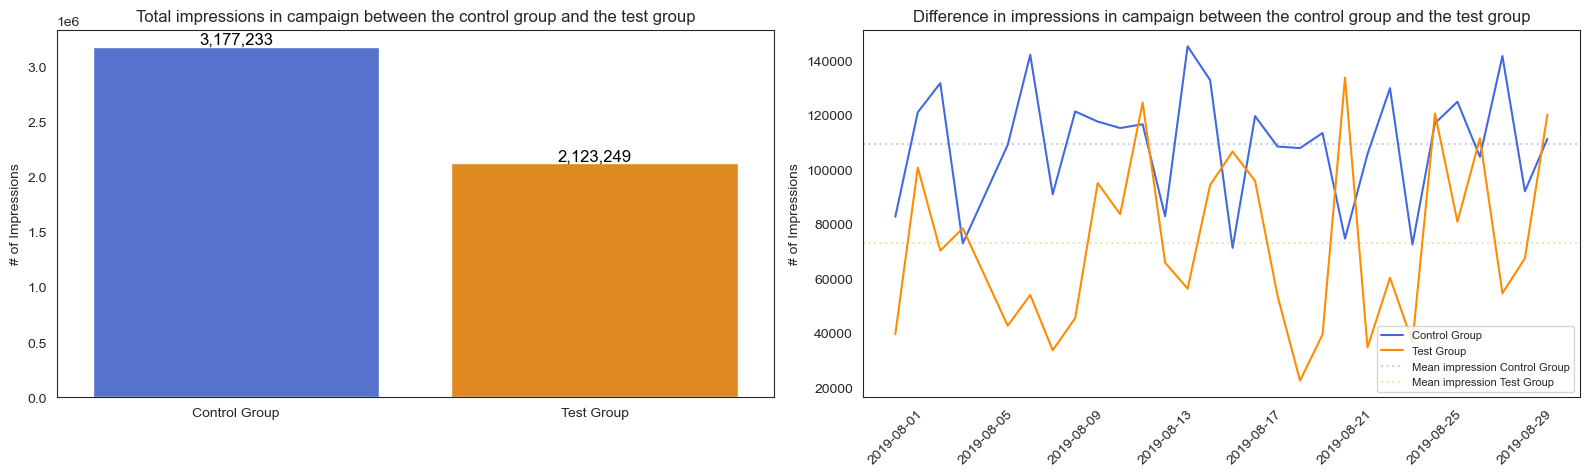

In [89]:
# Assuming control_group and test_group are DataFrames already defined
data = pd.DataFrame({
    'Group': ['Control Group', 'Test Group'],
    '# of Impressions': [control_group['# of Impressions'].sum(), test_group['# of Impressions'].sum()]
})

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Barplot (Left)
sns.barplot(x='Group', y='# of Impressions', data=data, hue='Group', 
            palette={'Control Group': 'royalblue', 'Test Group': 'darkorange'}, 
            legend=False, ax=axes[0])

# Add the sum values on top of the bars
for i, row in data.iterrows():
    axes[0].text(i, row['# of Impressions'] + 100, f"{row['# of Impressions']:,.0f}", 
                 color='black', ha='center', va='bottom', fontsize=12)

# Title for the barplot
axes[0].set_title('Total impressions in campaign between the control group and the test group')

# Spending curves (Right)
sns.lineplot(x='Date', y='# of Impressions', data=control_group, color='royalblue', label='Control Group', ax=axes[1])
sns.lineplot(x='Date', y='# of Impressions', data=test_group, color='darkorange', label='Test Group', ax=axes[1])

# Mean Impression
axes[1].axhline(control_group['# of Impressions'].mean(), color='royalblue', linestyle='dotted', alpha=0.3, label='Mean impression Control Group')
axes[1].axhline(test_group['# of Impressions'].mean(), color='darkorange', linestyle='dotted', alpha=0.3, label='Mean impression Test Group')

# Title for the lineplot
axes[1].set_title('Difference in impressions in campaign between the control group and the test group')

# Rotate x-axis labels and show legend
axes[1].tick_params(axis='x', rotation=45)  # Corrected method for rotating x-axis labels
axes[1].legend(fontsize=8, loc='lower right')

axes[0].set_xlabel('')
axes[1].set_xlabel('')

# Display the plots
plt.tight_layout()  # Adjust subplots for better spacing
plt.show()

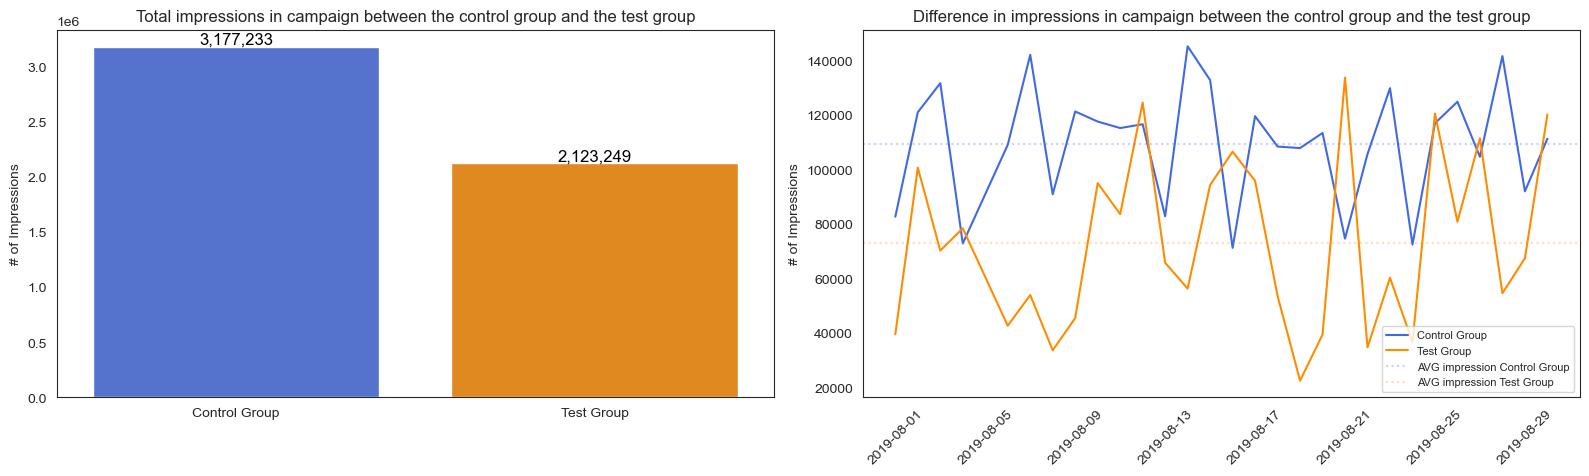

In [92]:
# Assuming control_group and test_group are DataFrames already defined
data = pd.DataFrame({
    'Group': ['Control Group', 'Test Group'],
    '# of Impressions': [control_group['# of Impressions'].sum(), test_group['# of Impressions'].sum()]
})

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Barplot (Left)
sns.barplot(x='Group', y='# of Impressions', data=data, hue='Group', 
            palette={'Control Group': 'royalblue', 'Test Group': 'darkorange'}, 
            legend=False, ax=axes[0])

# Add the sum values on top of the bars
for i, row in data.iterrows():
    axes[0].text(i, row['# of Impressions'] + 100, f"{row['# of Impressions']:,.0f}", 
                 color='black', ha='center', va='bottom', fontsize=12)

# Title for the barplot
axes[0].set_title('Total impressions in campaign between the control group and the test group')

# Spending curves (Right)
sns.lineplot(x='Date', y='# of Impressions', data=control_group, color='royalblue', label='Control Group', ax=axes[1])
sns.lineplot(x='Date', y='# of Impressions', data=test_group, color='darkorange', label='Test Group', ax=axes[1])

# Mean Impression
axes[1].axhline(control_group['# of Impressions'].mean(), color='royalblue', linestyle='dotted', alpha=0.3, label='AVG impression Control Group')
axes[1].axhline(test_group['# of Impressions'].mean(), color='darkorange', linestyle='dotted', alpha=0.3, label='AVG impression Test Group')

# Title for the lineplot
axes[1].set_title('Difference in impressions in campaign between the control group and the test group')

# Rotate x-axis labels and show legend
axes[1].tick_params(axis='x', rotation=45)  # Corrected method for rotating x-axis labels
axes[1].legend(fontsize=8, loc='lower right')

axes[0].set_xlabel('')
axes[1].set_xlabel('')

# Display the plots
plt.tight_layout()  # Adjust subplots for better spacing
plt.show()

The test group compaign did not reach as many people as the control one.

### 2.2. Spending difference between the control and the test group

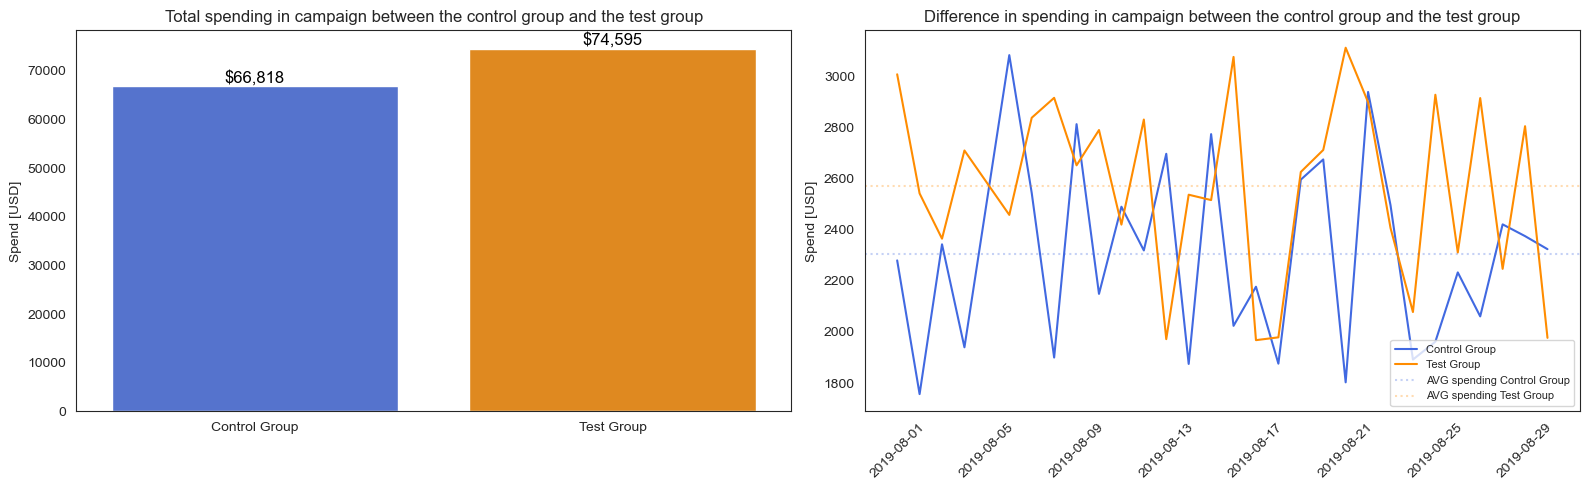

In [97]:
# Assuming control_group and test_group are DataFrames already defined
data = pd.DataFrame({
    'Group': ['Control Group', 'Test Group'],
    'Spend [USD]': [control_group['Spend [USD]'].sum(), test_group['Spend [USD]'].sum()]
})

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Barplot (Left)
sns.barplot(x='Group', y='Spend [USD]', data=data, hue='Group', 
            palette={'Control Group': 'royalblue', 'Test Group': 'darkorange'}, 
            legend=False, ax=axes[0])

# Add the sum values on top of the bars
for i, row in data.iterrows():
    axes[0].text(i, row['Spend [USD]'] + 100, f"${row['Spend [USD]']:,.0f}", 
                 color='black', ha='center', va='bottom', fontsize=12)

# Title for the barplot
axes[0].set_title('Total spending in campaign between the control group and the test group')

# Spending curves (Right)
sns.lineplot(x='Date', y='Spend [USD]', data=control_group, color='royalblue', label='Control Group', ax=axes[1])
sns.lineplot(x='Date', y='Spend [USD]', data=test_group, color='darkorange', label='Test Group', ax=axes[1])

# Mean spending
axes[1].axhline(control_group['Spend [USD]'].mean(), color='royalblue', linestyle='dotted', alpha=0.3, label='AVG spending Control Group')
axes[1].axhline(test_group['Spend [USD]'].mean(), color='darkorange', linestyle='dotted', alpha=0.3, label='AVG spending Test Group')

# Title for the lineplot
axes[1].set_title('Difference in spending in campaign between the control group and the test group')

# Rotate x-axis labels and show legend
axes[1].tick_params(axis='x', rotation=45)  # Corrected method for rotating x-axis labels
axes[1].legend(fontsize=8, loc='lower right')

axes[0].set_xlabel('')
axes[1].set_xlabel('')

# Display the plots
plt.tight_layout()  # Adjust subplots for better spacing
plt.show()

In [20]:
print(f'The test group has a {round(100 * test_group['Spend [USD]'].sum() / control_group['Spend [USD]'].sum() - 100, 2)}% higher spending than the control group.')

The test group has a 11.64% higher spending than the control group.


### 2.3. Purchase difference between the control and the test group


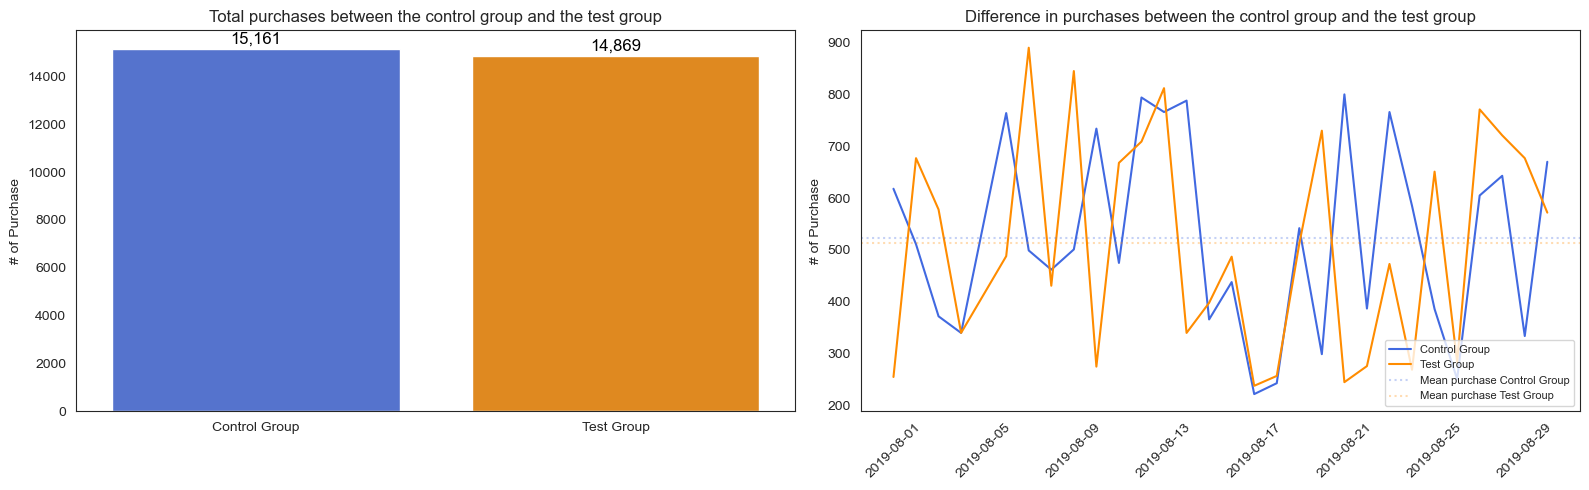

In [96]:
# Assuming control_group and test_group are DataFrames already defined
data = pd.DataFrame({
    'Group': ['Control Group', 'Test Group'],
    '# of Purchase': [control_group['# of Purchase'].sum(), test_group['# of Purchase'].sum()]
})

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Barplot (Left)
sns.barplot(x='Group', y='# of Purchase', data=data, hue='Group', 
            palette={'Control Group': 'royalblue', 'Test Group': 'darkorange'}, 
            legend=False, ax=axes[0])

# Add the sum values on top of the bars
for i, row in data.iterrows():
    axes[0].text(i, row['# of Purchase'] + 100, f"{row['# of Purchase']:,.0f}", 
                 color='black', ha='center', va='bottom', fontsize=12)

# Title for the barplot
axes[0].set_title('Total purchases between the control group and the test group')

# Purchase trends (Right)
sns.lineplot(x='Date', y='# of Purchase', data=control_group, color='royalblue', label='Control Group', ax=axes[1])
sns.lineplot(x='Date', y='# of Purchase', data=test_group, color='darkorange', label='Test Group', ax=axes[1])

# Mean purchases
axes[1].axhline(control_group['# of Purchase'].mean(), color='royalblue', linestyle='dotted', alpha=0.3, label='AVG purchase Control Group')
axes[1].axhline(test_group['# of Purchase'].mean(), color='darkorange', linestyle='dotted', alpha=0.3, label='AVG purchase Test Group')

# Title for the lineplot
axes[1].set_title('Difference in purchases between the control group and the test group')

# Rotate x-axis labels and show legend
axes[1].tick_params(axis='x', rotation=45)  # Corrected method for rotating x-axis labels
axes[1].legend(fontsize=8, loc='lower right')

axes[0].set_xlabel('')
axes[1].set_xlabel('')

# Display the plots
plt.tight_layout()  # Adjust subplots for better spacing
plt.show()

### 2.4. Lineplot of each variable

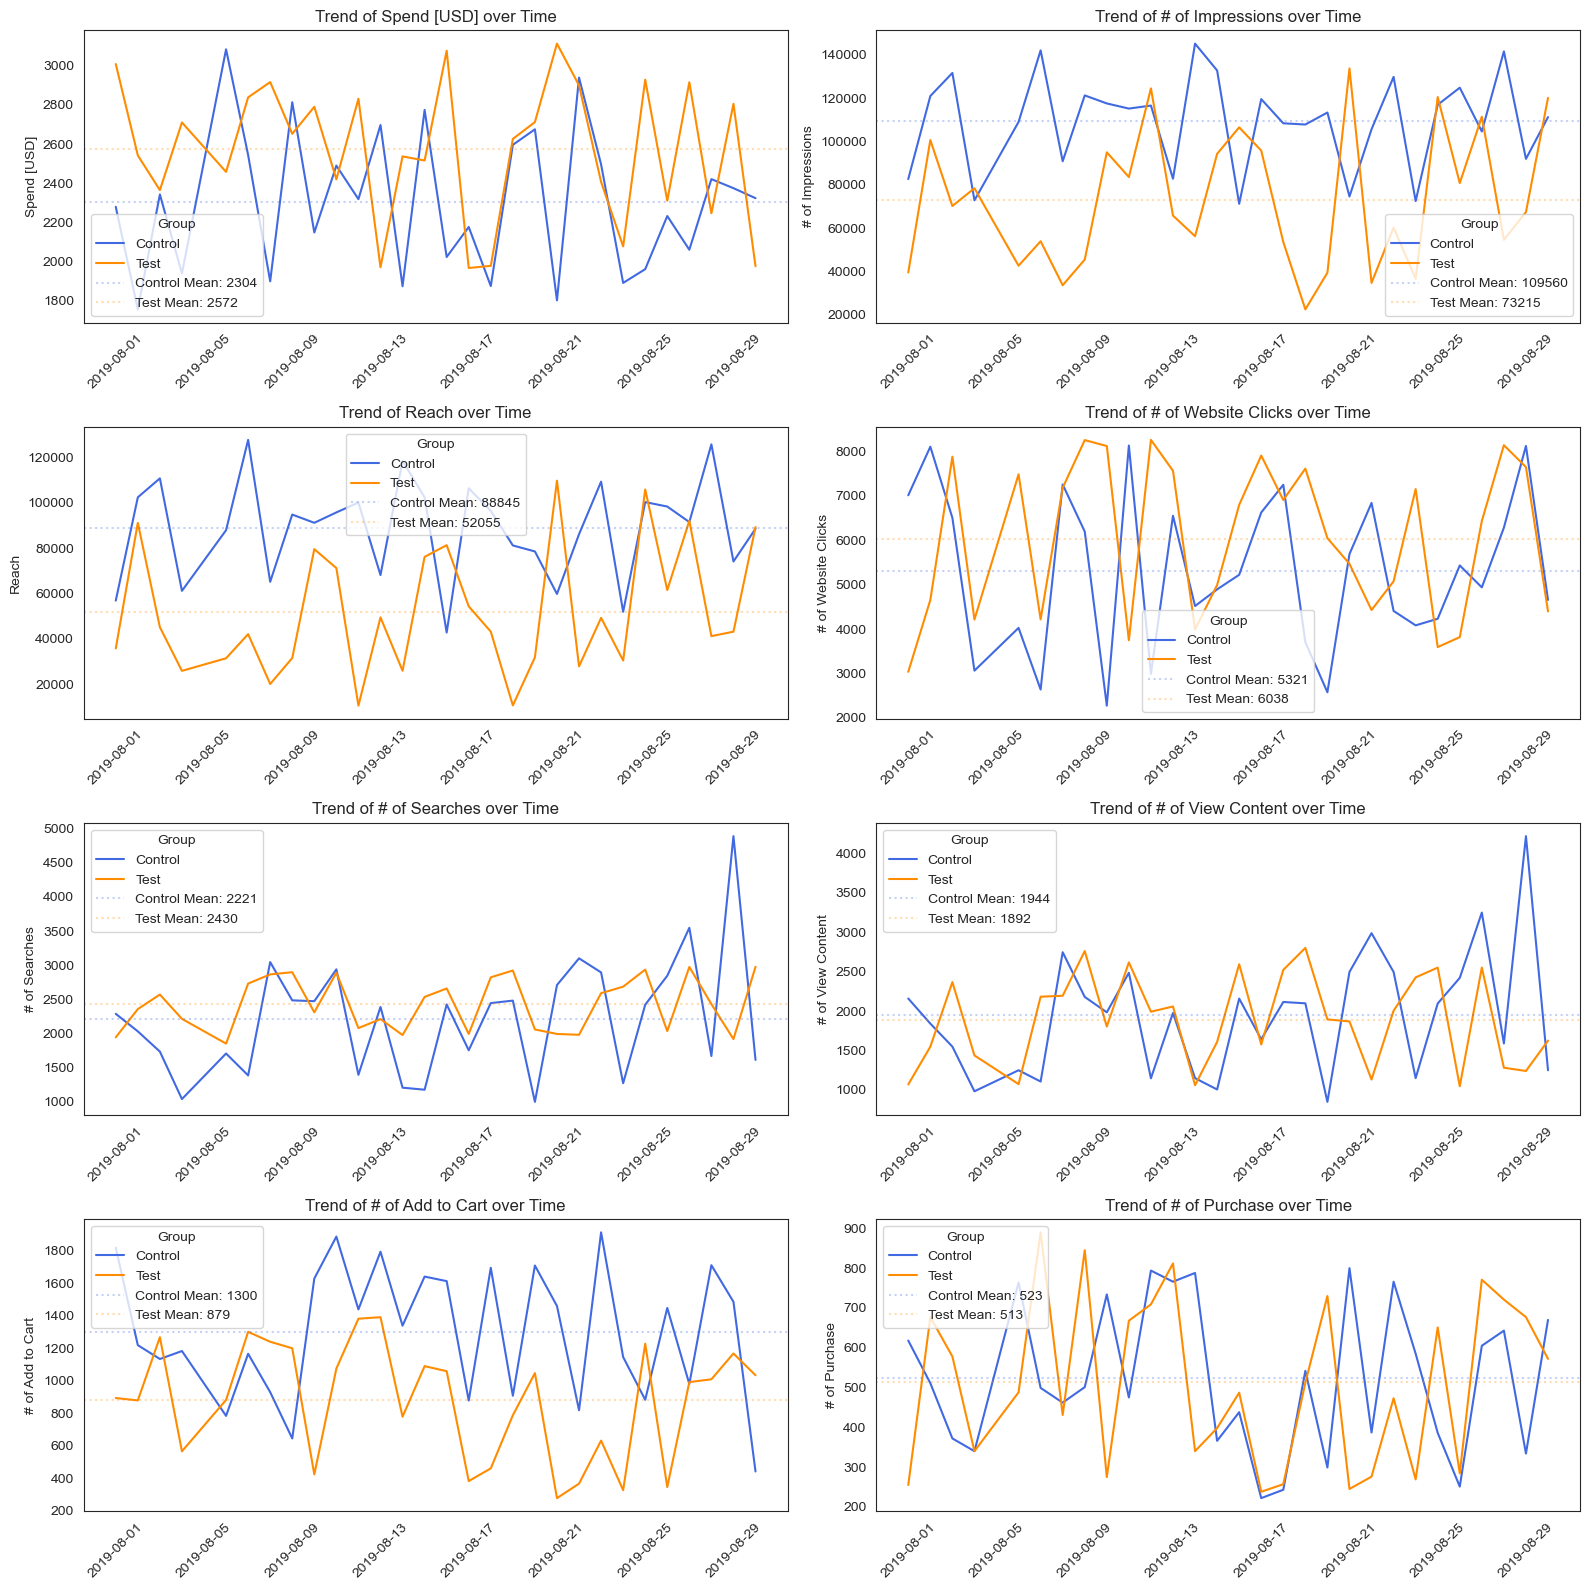

In [ ]:
# Assuming `control_group` and `test_group` are DataFrames with the same structure
# Merge the datasets and add a 'Group' column to distinguish them
control_group['Group'] = 'Control'
test_group['Group'] = 'Test'
data = pd.concat([control_group, test_group])

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Define the variables to plot (excluding non-numeric ones)
variables = [
    'Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks', 
    '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase'
]

# Set seaborn style
sns.set_style(style = "white")

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))  # Adjust grid size if needed
axes = axes.flatten()  # Flatten for easier iteration

# Iterate through variables and create plots
for i, var in enumerate(variables):
    ax = axes[i]
    
    # Create the lineplot
    sns.lineplot(data=data, x='Date', y=var, hue='Group', 
                 palette={'Control': 'royalblue', 'Test': 'darkorange'}, ax=ax)

    # Calculate means
    control_mean = control_group[var].mean()
    test_mean = test_group[var].mean()

    # Add horizontal mean lines
    ax.axhline(y=control_mean, color='royalblue', linestyle='dotted', alpha=0.3, label=f'Control AVG: {control_mean:.0f}')
    ax.axhline(y=test_mean, color='darkorange', linestyle='dotted', alpha=0.3, label=f'Test AVG: {test_mean:.0f}')

    # Title and labels
    ax.set_title(f'Trend of {var} over Time', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel(var)
    ax.legend(title='Group')

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Adjust layout for clarity
plt.tight_layout()
plt.show()

### 2.4. Exploratory

In [23]:
control_group['# of Purchase'].sum() / control_group['# of Website Clicks'].sum() * 100

9.825473257162855

In [24]:
test_group['# of Purchase'].sum() / test_group['# of Website Clicks'].sum() * 100

8.491379556499739

In [25]:
control_group['# of Purchase'].sum() / control_group['# of Add to Cart'].sum() * 100

40.214854111405835

In [26]:
test_group['# of Purchase'].sum() / test_group['# of Add to Cart'].sum() * 100

58.332679482149864

In [27]:
print('Price of website click for the control group: ', '$' + str(round((control_group['Spend [USD]'].sum() / control_group['# of Website Clicks'].sum()), 4)))
print('Price of website click for the test group: ', '$' + str(round((test_group['Spend [USD]'].sum() / test_group['# of Website Clicks'].sum()), 4)))


Price of website click for the control group:  $0.433
Price of website click for the test group:  $0.426


In [28]:
print('Price of purchase for the control group: ', '$' + str(round((control_group['Spend [USD]'].sum() / control_group['# of Purchase'].sum()), 4)))
print('Price of purchase for the test group: ', '$' + str(round((test_group['Spend [USD]'].sum() / test_group['# of Purchase'].sum()), 4)))


Price of purchase for the control group:  $4.4072
Price of purchase for the test group:  $5.0168


In [29]:
print('Price of view content for the control group: ', '$' + str(round((control_group['Spend [USD]'].sum() / control_group['# of View Content'].sum()), 4)))
print('Price of view content for the test group: ', '$' + str(round((test_group['Spend [USD]'].sum() / test_group['# of View Content'].sum()), 4)))


Price of view content for the control group:  $1.1853
Price of view content for the test group:  $1.3592


## 3. Outliers

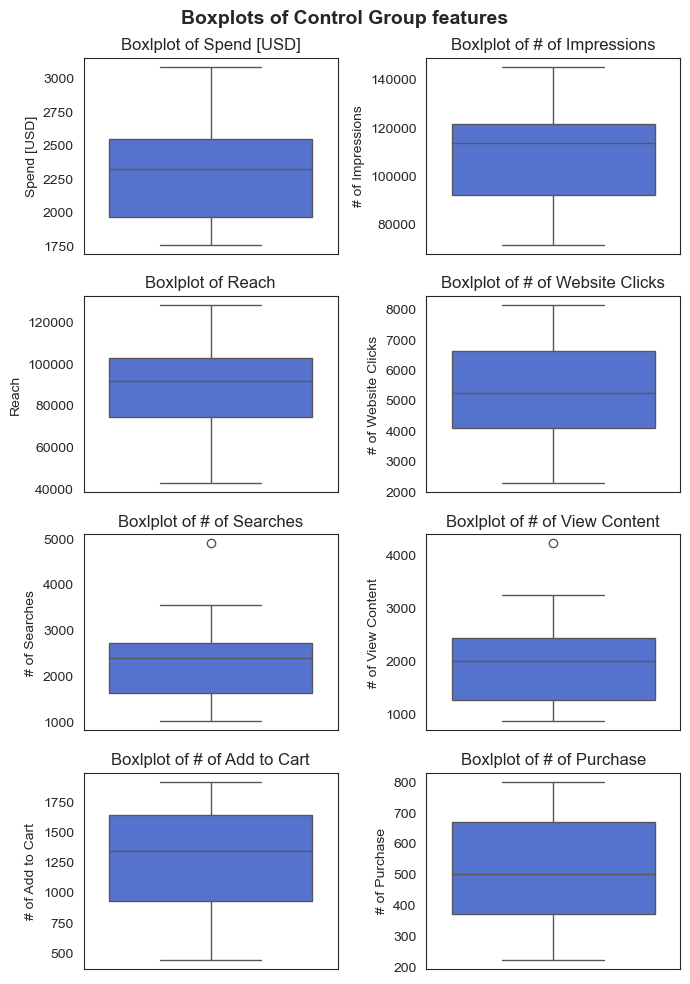

In [30]:
# Define the variables to plot (excluding non-numeric ones)
variables = [
    'Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks', 
    '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase'
]

# Set seaborn style
sns.set_style(style = "white")

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(7, 10))
axes = axes.flatten()  # Flatten for easier iteration

# Add a main title on top of the subplot
fig.suptitle('Boxplots of Control Group features', fontsize=14, fontweight='bold')

# Iterate through variables and create plots
for i, var in enumerate(variables):
    ax = axes[i]
    
    # Create the boxplot
    sns.boxplot(data=control_group, y=var,
                 color='royalblue', ax=ax)

    # Title and labels
    ax.set_title(f'Boxlplot of {var}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel(var)

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Adjust layout for clarity
plt.tight_layout()
plt.show()

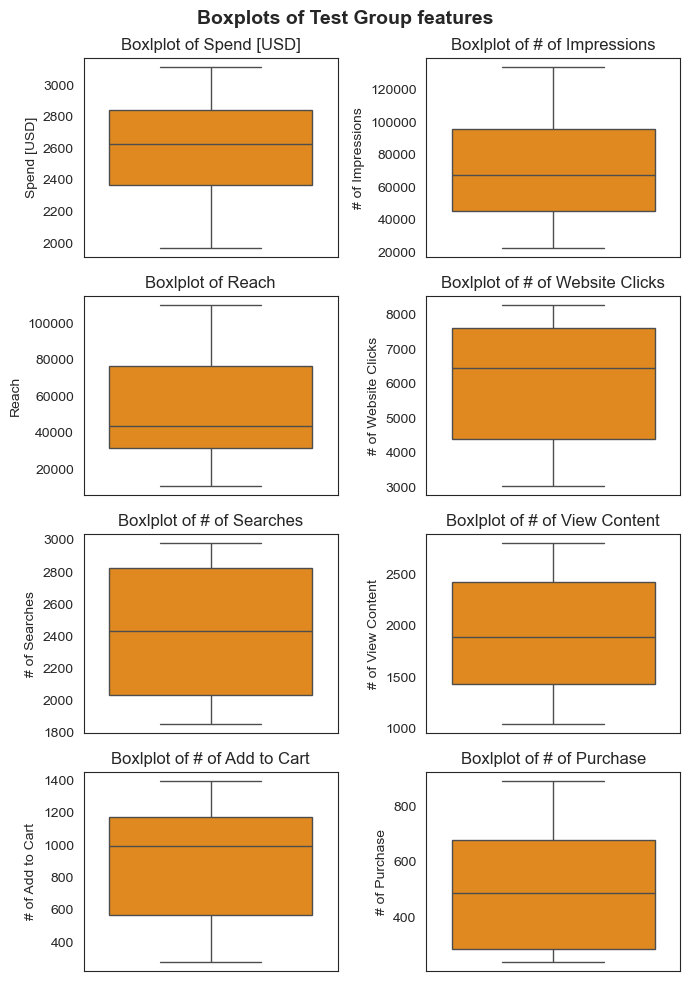

In [31]:
# Define the variables to plot (excluding non-numeric ones)
variables = [
    'Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks', 
    '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase'
]

# Set seaborn style
sns.set_style(style = "white")

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(7, 10))
axes = axes.flatten()  # Flatten for easier iteration

# Add a main title on top of the subplot
fig.suptitle('Boxplots of Test Group features', fontsize=14, fontweight='bold')

# Iterate through variables and create plots
for i, var in enumerate(variables):
    ax = axes[i]
    
    # Create the boxplot
    sns.boxplot(data=test_group, y=var,
                 color='darkorange', ax=ax)

    # Title and labels
    ax.set_title(f'Boxlplot of {var}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel(var)

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Adjust layout for clarity
plt.tight_layout()
plt.show()

In [32]:
def find_outliers_iqr(data, column):
    """
    Identifies outliers in a dataset using the Interquartile Range (IQR) method.

    Parameters:
    - data (pd.DataFrame): The dataset.
    - column (str): The column to check for outliers.
    """
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers

In [33]:
find_outliers_iqr(control_group, '# of Searches')

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Group
28,Control Campaign,2019-08-29,2375,92029,74192,8127,4891,4219,1486,334,Control


In [34]:
find_outliers_iqr(control_group, '# of View Content')

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Group
28,Control Campaign,2019-08-29,2375,92029,74192,8127,4891,4219,1486,334,Control


In [35]:
print(f'Both outliers are on the same compaign, which represents {round(1 / control_group.shape[0] * 100, 2)}% of the dataset.')

Both outliers are on the same compaign, which represents 3.45% of the dataset.


Knowing that we already removed a compaign from the Control group we could replace the values from "# of Searches" and "# of View Content" with the mode or using another method like the median.

In [36]:
def replace_outliers_with_median(data, column):
    """
    Identifies and replaces outliers in a dataset using the Interquartile Range (IQR) method.

    Parameters:
    - data (pd.DataFrame): The dataset.
    - column (str): The column to check for outliers.

    Returns:
    - data (pd.DataFrame): The dataset with outliers replaced.
    """
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Compute median
    median_value = data[column].median()

    # Replace outliers with the median
    data[column] = data[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    
    return data

In [37]:
control_group_no_outliers = replace_outliers_with_median(control_group, '# of Searches')
control_group_no_outliers = replace_outliers_with_median(control_group_no_outliers, '# of View Content')

In [38]:
find_outliers_iqr(control_group_no_outliers, '# of Searches').shape

(0, 11)

In [39]:
find_outliers_iqr(control_group_no_outliers, '# of View Content').shape

(0, 11)

## 4. Metrics to test

In [40]:
## Cost per impressions 
control_group_no_outliers['Cost_per_impressions'] = control_group_no_outliers['Spend [USD]'] / control_group_no_outliers['# of Impressions']
test_group['Cost_per_impressions'] = test_group['Spend [USD]'] / test_group['# of Impressions']

## Cost per website click
control_group_no_outliers['Cost_per_click'] = control_group_no_outliers['Spend [USD]'] / control_group_no_outliers['# of Website Clicks']
test_group['Cost_per_click'] = test_group['Spend [USD]'] / test_group['# of Website Clicks']

## Click through rate
control_group_no_outliers['Click_through_rate'] = control_group_no_outliers['# of Website Clicks'] / control_group_no_outliers['# of Impressions'] * 100
test_group['Click_through_rate'] = test_group['# of Website Clicks'] / test_group['# of Impressions'] * 100

## Overall conversion rate
control_group_no_outliers['Conversion_rate'] = control_group_no_outliers['# of Purchase'] / control_group_no_outliers['# of Website Clicks'] * 100
test_group['Conversion_rate'] = test_group['# of Purchase'] / test_group['# of Website Clicks'] * 100

## Revenue per click
control_group_no_outliers['Revenue_per_click'] = control_group_no_outliers['# of Purchase'].sum() / control_group_no_outliers['# of Website Clicks']
test_group['Revenue_per_click'] = test_group['# of Purchase'].sum() / test_group['# of Website Clicks']

In [41]:
control_group_no_outliers.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Group,Cost_per_impressions,Cost_per_click,Click_through_rate,Conversion_rate,Revenue_per_click
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290.0,2159.0,1819,618,Control,0.027569,0.324971,8.483471,8.808438,2.160918
1,Control Campaign,2019-08-02,1757,121040,102513,8110,2033.0,1841.0,1219,511,Control,0.014516,0.216646,6.700264,6.300863,1.869420
2,Control Campaign,2019-08-03,2343,131711,110862,6508,1737.0,1549.0,1134,372,Control,0.017789,0.360018,4.941121,5.716042,2.329594
3,Control Campaign,2019-08-04,1940,72878,61235,3065,1042.0,982.0,1183,340,Control,0.026620,0.632953,4.205659,11.092985,4.946493
5,Control Campaign,2019-08-06,3083,109076,87998,4028,1709.0,1249.0,784,764,Control,0.028265,0.765392,3.692838,18.967229,3.763903


In [42]:
test_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Group,Cost_per_impressions,Cost_per_click,Click_through_rate,Conversion_rate,Revenue_per_click
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255,Test,0.076056,0.990125,7.681416,8.393680,4.894338
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677,Test,0.025239,0.545845,4.623755,14.537256,3.192828
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578,Test,0.033659,0.299937,11.222123,7.330374,1.885732
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340,Test,0.034544,0.642789,5.374055,8.064516,3.526803
5,Test Campaign,2019-08-06,2458,42684,31489,7488,1854,1073,882,488,Test,0.057586,0.328259,17.542873,6.517094,1.985710


## 5. Will the A/B testing be reliable ?

In general, for normally distributed data with low variance, around 30 to 50 observations are usually sufficient. However, in our case, the standard deviations are high for all variables, making the A/B testing less reliable.

In [43]:
control_group.describe()

,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Cost_per_impressions,Cost_per_click,Click_through_rate,Conversion_rate,Revenue_per_click
count,29,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2019-08-15 20:41:22.758620672,2304.068966,109559.758621,88844.931034,5320.793103,2135.068966,1866.724138,1300.000000,522.793103,0.021716,0.494908,5.095871,11.477203,3.239620
min,2019-08-01 00:00:00,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000,0.012909,0.216646,1.857546,3.349427,1.863217
25%,2019-08-09 00:00:00,1962.000000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000,0.017900,0.328455,3.618618,6.300863,2.287417
50%,2019-08-16 00:00:00,2319.000000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000,0.020881,0.417122,4.720190,10.227453,2.902182
75%,2019-08-23 00:00:00,2544.000000,121332.000000,102479.000000,6628.000000,2487.000000,2179.000000,1641.000000,670.000000,0.025807,0.566585,6.700264,14.383856,3.711383
max,2019-08-30 00:00:00,3083.000000,145248.000000,127852.000000,8137.000000,3549.000000,3249.000000,1913.000000,800.000000,0.032554,1.037626,8.830912,32.235397,6.658322
std,NaN,363.534822,21688.922908,21832.349595,1757.369003,699.199181,643.121733,407.457973,185.028642,0.004754,0.221015,2.050769,6.838270,1.305114


In [44]:
test_group.describe()

,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Cost_per_impressions,Cost_per_click,Click_through_rate,Conversion_rate,Revenue_per_click
count,29,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2019-08-15 20:41:22.758620672,2572.241379,73215.482759,52055.482759,6038.172414,2429.758621,1892.482759,878.965517,512.724138,0.043460,0.471371,10.418555,9.097805,2.701185
min,2019-08-01 00:00:00,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,1046.000000,278.000000,238.000000,0.016447,0.248799,2.982351,3.008850,1.799250
25%,2019-08-09 00:00:00,2365.000000,45511.000000,31489.000000,4399.000000,2037.000000,1437.000000,566.000000,284.000000,0.026670,0.328259,5.374055,6.517094,1.952081
50%,2019-08-16 00:00:00,2626.000000,67444.000000,43241.000000,6435.000000,2432.000000,1894.000000,992.000000,488.000000,0.034544,0.449420,8.253081,8.393680,2.310645
75%,2019-08-23 00:00:00,2838.000000,95843.000000,76219.000000,7617.000000,2824.000000,2427.000000,1168.000000,677.000000,0.056698,0.604974,12.882234,10.729387,3.380086
max,2019-08-30 00:00:00,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000,0.116602,0.990125,33.821766,21.085051,4.894338
std,NaN,351.155100,31786.355952,28190.975729,1738.505086,391.022986,577.063355,353.446953,209.480633,0.023777,0.181124,6.820313,4.466280,0.882134


### 5.1. Normality test

We use Shapiro-Wilk test with a significance level of 5% since we have only 29 samples in our datasets.

Normality Test Results (Shapiro-Wilk Test):

Control Group - Cost_per_impressions
Cost_per_impressions: W-statistic = 0.9678, p-value = 0.5005
✅ Cost_per_impressions appears to be normally distributed (Fail to reject H0)
--------------------------------------------------
Test Group - Cost_per_impressions
Cost_per_impressions: W-statistic = 0.8523, p-value = 0.0008
❌ Cost_per_impressions is NOT normally distributed (Reject H0)
--------------------------------------------------
Control Group - Cost_per_click
Cost_per_click: W-statistic = 0.8767, p-value = 0.0028
❌ Cost_per_click is NOT normally distributed (Reject H0)
--------------------------------------------------
Test Group - Cost_per_click
Cost_per_click: W-statistic = 0.9131, p-value = 0.0204
❌ Cost_per_click is NOT normally distributed (Reject H0)
--------------------------------------------------
Control Group - Click_through_rate
Click_through_rate: W-statistic = 0.9549, p-value = 0.2448
✅ Click_through_rate appears to be norma

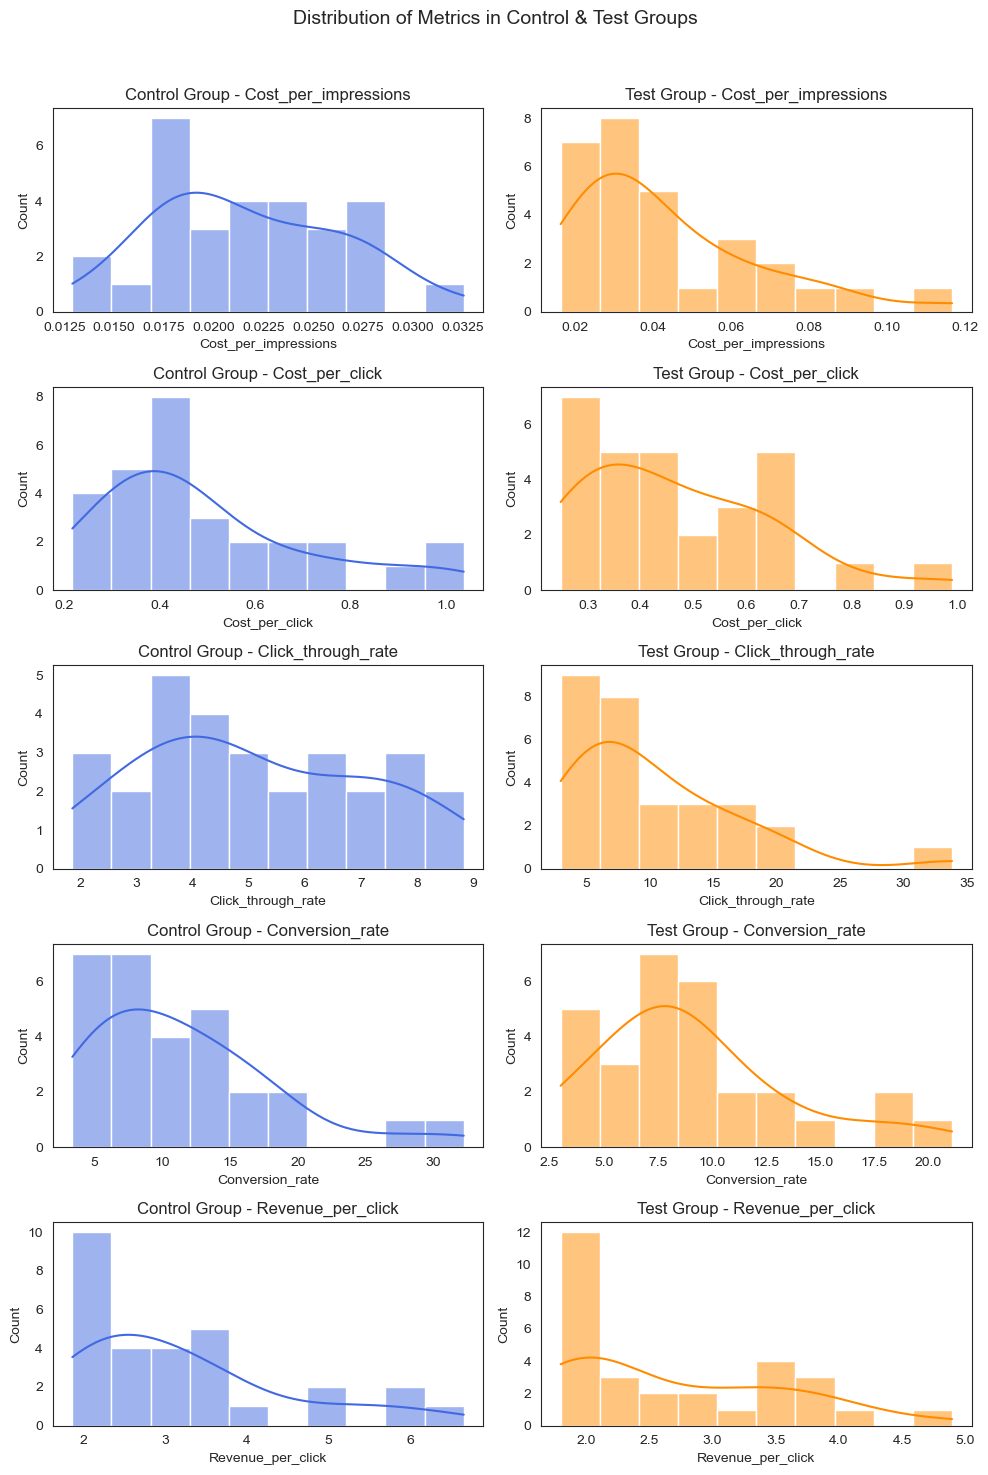

In [45]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Define the metrics to test for normality
metrics = [
    'Cost_per_impressions', 'Cost_per_click', 'Click_through_rate', 
    'Conversion_rate', 'Revenue_per_click'
]

# Function to test normality using Shapiro-Wilk Test
def test_normality(data, metric):
    stat, p_value = stats.shapiro(data[metric])
    print(f"{metric}: W-statistic = {stat:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"❌ {metric} is NOT normally distributed (Reject H0)")
    else:
        print(f"✅ {metric} appears to be normally distributed (Fail to reject H0)")
    print("-" * 50)

# Test normality for both Control and Test groups
print("Normality Test Results (Shapiro-Wilk Test):\n")
for metric in metrics:
    print(f"Control Group - {metric}")
    test_normality(control_group_no_outliers, metric)
    
    print(f"Test Group - {metric}")
    test_normality(test_group, metric)

# Plot histograms for visual inspection
fig, axes = plt.subplots(len(metrics), 2, figsize=(10, 15))
fig.suptitle("Distribution of Metrics in Control & Test Groups", fontsize=14)

for i, metric in enumerate(metrics):
    # Control group histogram
    sns.histplot(control_group_no_outliers[metric], kde=True, bins=10, ax=axes[i, 0], color='royalblue')
    axes[i, 0].set_title(f"Control Group - {metric}")
    
    # Test group histogram
    sns.histplot(test_group[metric], kde=True, bins=10, ax=axes[i, 1], color='darkorange')
    axes[i, 1].set_title(f"Test Group - {metric}")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()

Most of the metrics we want to test do not follow a normal distribution. Therefore, we will use non-parametric tests that do not rely on the normality assumption. Specifically, we will perform a Mann-Whitney U-test and apply bootstrap resampling to verify the consistency of our results due to our really small sample sizes. Since we are not using a t-test, we do not need to check for homoscedasticity.

We could also perform a power analysis to approximate the sample size needed per group to do a T-test.

In [46]:
from statsmodels.stats.power import TTestIndPower

# Define parameters
effect_size = 0.5  # Expected difference in conversion rate
alpha = 0.05  # Significance level (5%)
power = 0.8  # Desired statistical power (80%)

# Perform power analysis
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

print(f"Required sample size per group to perform a T-test: {round(sample_size)}")

Required sample size per group to perform a T-test: 64


### 5.2. Mann-Whitney U test

$H_0$ : There is no significant difference for the performance of the metric tested between the two groups.

$H_1$ : There is a significant difference for the performance of the metric tested between the two groups.

In [47]:
metrics = [
    'Cost_per_click', 'Cost_per_impressions', 'Click_through_rate', 'Conversion_rate', 'Revenue_per_click'
]

In [48]:
from scipy.stats import mannwhitneyu
print('Mann-Whitney U test')

for metric in metrics:
    print(f'\n{metric}')
    stat, p = mannwhitneyu(control_group_no_outliers[metric], 
                        test_group[metric])
    print(f'U-stat = {stat}, P-value = {p:.5f}')
    if p < 0.05:
        print(f'✅ We can reject the Null Hypothesis, there is a significant difference')
    else:
        print(f'❌ We fail to reject the Null Hypothesis, there is no significant difference')

Mann-Whitney U test

Cost_per_click
U-stat = 432.0, P-value = 0.86417
❌ We fail to reject the Null Hypothesis, there is no significant difference

Cost_per_impressions
U-stat = 98.0, P-value = 0.00000
✅ We can reject the Null Hypothesis, there is a significant difference

Click_through_rate
U-stat = 181.0, P-value = 0.00020
✅ We can reject the Null Hypothesis, there is a significant difference

Conversion_rate
U-stat = 493.0, P-value = 0.26284
❌ We fail to reject the Null Hypothesis, there is no significant difference

Revenue_per_click
U-stat = 532.0, P-value = 0.08431
❌ We fail to reject the Null Hypothesis, there is no significant difference


### 5.3. Bootstrap Resampling

This method is useful when the dataset has a small sample size. If the 95% Confidence Interval (CI) of the bootstrap contains 0, then it means that there is no significant difference between the two groups which means we fail to reject the null hypothesis stated in the previous point. If the bootstrap 95 CI does not contain 0, it means that there is a significant difference between the two groups, in other word, we can reject the null hypothesis in favor of tje alternative hypothesis.

So : 
- **CI include 0** :
    - ✅ Suggests that the difference between the two groups is statistically significant at the 95% confidence level → Reject null hypothesis
- **CI does not include 0** : 
    - ❌ Suggests that the difference between the two groups could be zero, meaning there is no evidence for a significant difference at the 95% confidence level → Fail to reject null hypothesis

In [80]:
import numpy as np

# Bootstrap function
def bootstrap_test(data1, data2, num_samples=10000):
    boot_diffs = []
    for _ in range(num_samples):
        boot1 = np.random.choice(data1, size=len(data1), replace=True)
        boot2 = np.random.choice(data2, size=len(data2), replace=True)
        boot_diffs.append(np.median(boot2) - np.median(boot1))  # Use median because of skewed data
    return np.percentile(boot_diffs, [2.5, 97.5])  # 95% Confidence Interval

print('Bootstrap Resampling test :')

for metric in metrics:
    print(f'\n{metric}')
    ci = bootstrap_test(control_group_no_outliers[metric], test_group[metric])
    print(f"Bootstrap 95% Confidence Interval for Cost per Click: {ci}")

    # Check if CI contains 0
    if ci[0] <= 0 <= ci[1]:
        print("❌ We fail to reject the Null Hypothesis, there is no significant difference")
    else:
        print("✅ We can reject the Null Hypothesis, there is a significant difference")

Bootstrap Resampling test :

Cost_per_click
Bootstrap 95% Confidence Interval for Cost per Click: [-0.11832256  0.12872292]
❌ We fail to reject the Null Hypothesis, there is no significant difference

Cost_per_impressions
Bootstrap 95% Confidence Interval for Cost per Click: [0.00576891 0.02417959]
✅ We can reject the Null Hypothesis, there is a significant difference

Click_through_rate
Bootstrap 95% Confidence Interval for Cost per Click: [1.09165282 7.15936657]
✅ We can reject the Null Hypothesis, there is a significant difference

Conversion_rate
Bootstrap 95% Confidence Interval for Cost per Click: [-5.66360338  1.10389025]
❌ We fail to reject the Null Hypothesis, there is no significant difference

Revenue_per_click
Bootstrap 95% Confidence Interval for Cost per Click: [-1.27562484  0.52879707]
❌ We fail to reject the Null Hypothesis, there is no significant difference


There is something to bear in mind when interpreting our results is that the wider the confidence interval, the less certain we are about the difference between the two groups, and vice versa. 

In any case, we find the same results as for our Mann-Whitney U-test.

## 6. Information summary

In a nutshell, we can state that :

- There **is no** significant difference in the **Cost per click** between the control and test groups.
- There **is no** significant difference in the **Conversion rate** between the control and test groups.
- There **is no** significant difference in the **Revenue per click** between the control and test groups.
- There **is** a significant difference in the **Cost per impressions** between the control and test groups.
- There **is** a significant difference in the **Click through rate** between the control and test groups.


In [88]:
for metric in metrics :

    median_control = np.median(control_group_no_outliers[metric])
    median_test = np.median(test_group[metric])

    percent_diff = ((median_test - median_control) / median_control) * 100
    print(f"Percentage Difference for {metric}: {percent_diff:.2f}%")

Percentage Difference for Cost_per_click: 7.74%
Percentage Difference for Cost_per_impressions: 65.43%
Percentage Difference for Click_through_rate: 74.85%
Percentage Difference for Conversion_rate: -17.93%
Percentage Difference for Revenue_per_click: -20.38%


1. The test compaign is more expensive than the control compaign
    - The **Cost per Impression** is **significantly** higher (+65.43%)
    - The **Cost per Click** is also higher (+7.74%) but **not significantly**

2. But the test compaign is also more engaging
    - The **Click Through Rate** is **significantly** higher (+74.85%)
        >This means that more users are clicking on the test ads compared to the control

3. Lower conversion efficiency
    - The **Conversion Rate** is lower (-17.93%), but **not significantly**
    - The **Revenue per Click** is also lower (-20.38%), but **not significantly**
        >This suggests that while the test campaign is getting more clicks, those clicks are less valuable

## Conclusion

- If the goal is to maximize engagement (clicks) → The test campaign is a success!


- If the goal is to reduce costs or improve conversions → The test campaign is performing worse.


- If revenue is the main goal → More clicks are coming in, but they are less valuable (lower RPC).